In [97]:
import pandas as pd

In [98]:
df=pd.read_csv("/content/tree.csv")
df

,Days,Outlook,Temprature,Routine,Wear Jacket?
0,1,Sunny,Cold,Indoor,No
1,2,Cloudy,Cold,Indoor,Yes
2,3,Cloudy,Warm,Outdoor,No
3,4,Sunny,Cold,Outdoor,Yes
4,5,Cloudy,Cold,Outdoor,Yes
5,6,Sunny,Warm,Outdoor,No
6,7,Cloudy,Warm,Indoor,No
7,8,Sunny,Warm,Indoor,No


In [99]:
x=df.drop(['Days','Wear Jacket?'],axis=1)
x

,Outlook,Temprature,Routine
0,Sunny,Cold,Indoor
1,Cloudy,Cold,Indoor
2,Cloudy,Warm,Outdoor
3,Sunny,Cold,Outdoor
4,Cloudy,Cold,Outdoor
5,Sunny,Warm,Outdoor
6,Cloudy,Warm,Indoor
7,Sunny,Warm,Indoor


In [100]:
y=df[['Wear Jacket?']]
y

,Wear Jacket?
0,No
1,Yes
2,No
3,Yes
4,Yes
5,No
6,No
7,No


In [101]:
from sklearn.preprocessing import LabelEncoder

In [102]:
le=LabelEncoder()

In [113]:
Outlook=le.fit_transform(Outlook)
Temprature=le.fit_transform(Temprature)
Routine=le.fit_transform(Routine)

In [116]:
x['Outlook']=Outlook

In [115]:
x['Temprature']=Temprature

In [117]:
x['Routine']=Routine

In [118]:
x

,Outlook,Temprature,Routine
0,1,0,0
1,0,0,0
2,0,1,1
3,1,0,1
4,0,0,1
5,1,1,1
6,0,1,0
7,1,1,0


In [119]:
from sklearn import tree

In [120]:
from sklearn.tree import DecisionTreeClassifier

In [121]:
dt=DecisionTreeClassifier()

In [122]:
dt.fit(x,y)

DecisionTreeClassifier()

[Text(0.6, 0.875, 'X[1] <= 0.5\ngini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(0.4, 0.625, 'X[0] <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.2, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.6, 0.375, 'X[2] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.4, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8, 0.625, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]')]

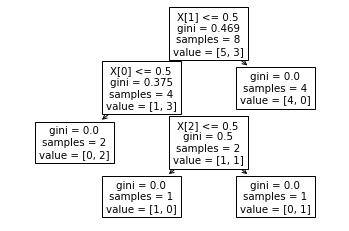

In [124]:
tree.plot_tree(dt)

[Text(0.6, 0.875, 'X[1] <= 0.5\ngini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(0.4, 0.625, 'X[0] <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.2, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.6, 0.375, 'X[2] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.4, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8, 0.625, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]')]

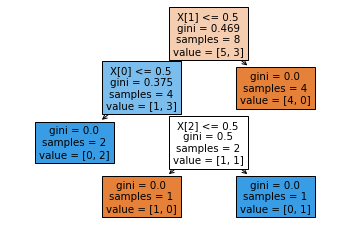

In [125]:
tree.plot_tree(dt,filled=True)

In [126]:
x.columns

Index(['Outlook', 'Temprature', 'Routine'], dtype='object')

[Text(0.6, 0.875, 'Temprature <= 0.5\ngini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(0.4, 0.625, 'Outlook <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.2, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.6, 0.375, 'Routine <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.4, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8, 0.625, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]')]

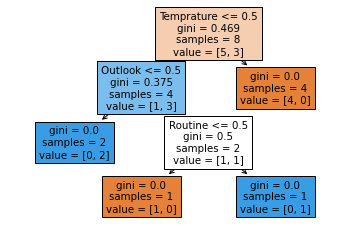

In [128]:
tree.plot_tree(dt,filled=True,feature_names=x.columns)

In [129]:
dt.predict([[1,0,0]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


array(['No'], dtype=object)

In [130]:
from sklearn.model_selection import train_test_split

In [131]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=.75,random_state=1)

In [132]:
xtrain

,Outlook,Temprature,Routine
1,0,0,0
6,0,1,0
0,1,0,0
4,0,0,1
3,1,0,1
5,1,1,1


In [133]:
xtest

,Outlook,Temprature,Routine
7,1,1,0
2,0,1,1


In [134]:
ytrain

,Wear Jacket?
1,Yes
6,No
0,No
4,Yes
3,Yes
5,No


In [135]:
ytest

,Wear Jacket?
7,No
2,No


In [136]:
dt.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [137]:
dt.score(xtrain,ytrain)

1.0

In [138]:
dt.score(xtest,ytest)

1.0

In [140]:
pred_y=dt.predict(xtest)
pred_y

array(['No', 'No'], dtype=object)

In [142]:
ytest

,Wear Jacket?
7,No
2,No


In [144]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, plot_roc_curve

In [145]:
print(classification_report(ytest,pred_y))

              precision    recall  f1-score   support

          No       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



In [146]:
accuracy_score(ytest,pred_y)

1.0

In [148]:
print(confusion_matrix(ytest,pred_y))

[[2]]


In [149]:
import seaborn as sns

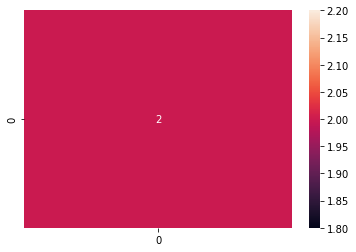

In [152]:
cm=confusion_matrix(ytest,pred_y)
sns.heatmap(cm,annot=True)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,


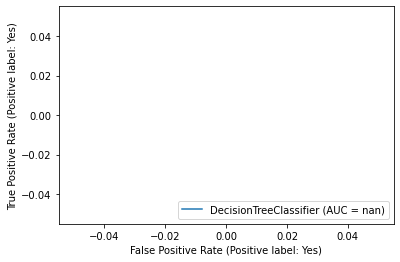

In [153]:
plot_roc_curve(dt,xtest,ytest)